# K Vecinos más cercanos con Python sin estandarizacion

¡Le dieron un conjunto de datos clasificados de una compañía! Han ocultado los nombres de las columnas de características, pero le han proporcionado los datos y las clases de destino.

Intentaremos usar KNN para crear un modelo que prediga directamente una clase para un nuevo punto de datos basado en las características.

¡Comencemos!

## Importación de librerias



In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obtener los datos

Establecer index_col=0 para usar la primera columna como índice.

In [40]:
df = pd.read_csv("Classified Data",index_col=0)

In [41]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [42]:
df.tail()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


In [43]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


## División en conjunto de entrenamiento y prueba

In [45]:
from sklearn.model_selection import train_test_split

In [47]:
X=df.drop(['TARGET CLASS'],axis=1)
y=df['TARGET CLASS']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,
                                                    random_state=100)

## Uso de KNN (K vecinos más cercanos)

Recuerde que estamos tratando de encontrar un modelo para predecir si algo es TARGET CLASS o no. Comenzaremos con k = 1.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=1)

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
pred = knn.predict(X_test)

## Predicciones y Evaluaciones

¡Evaluemos nuestro modelo KNN!

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(confusion_matrix(y_test,pred))

[[144  18]
 [  8 130]]


In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       162
           1       0.88      0.94      0.91       138

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300



## Elección del valor de K

Avancemos y usemos el método del codo para elegir un buen valor de K:

In [30]:
#Forma en la que se calcula el error
pred=[0,1,0,1,0]
real=[0,1,0,1,1]
c=np.mean(np.array(pred) != np.array(real))
print(c)

0.2


In [56]:
tasa_error = []

# Tomará algún tiempo
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Tasa de Error')

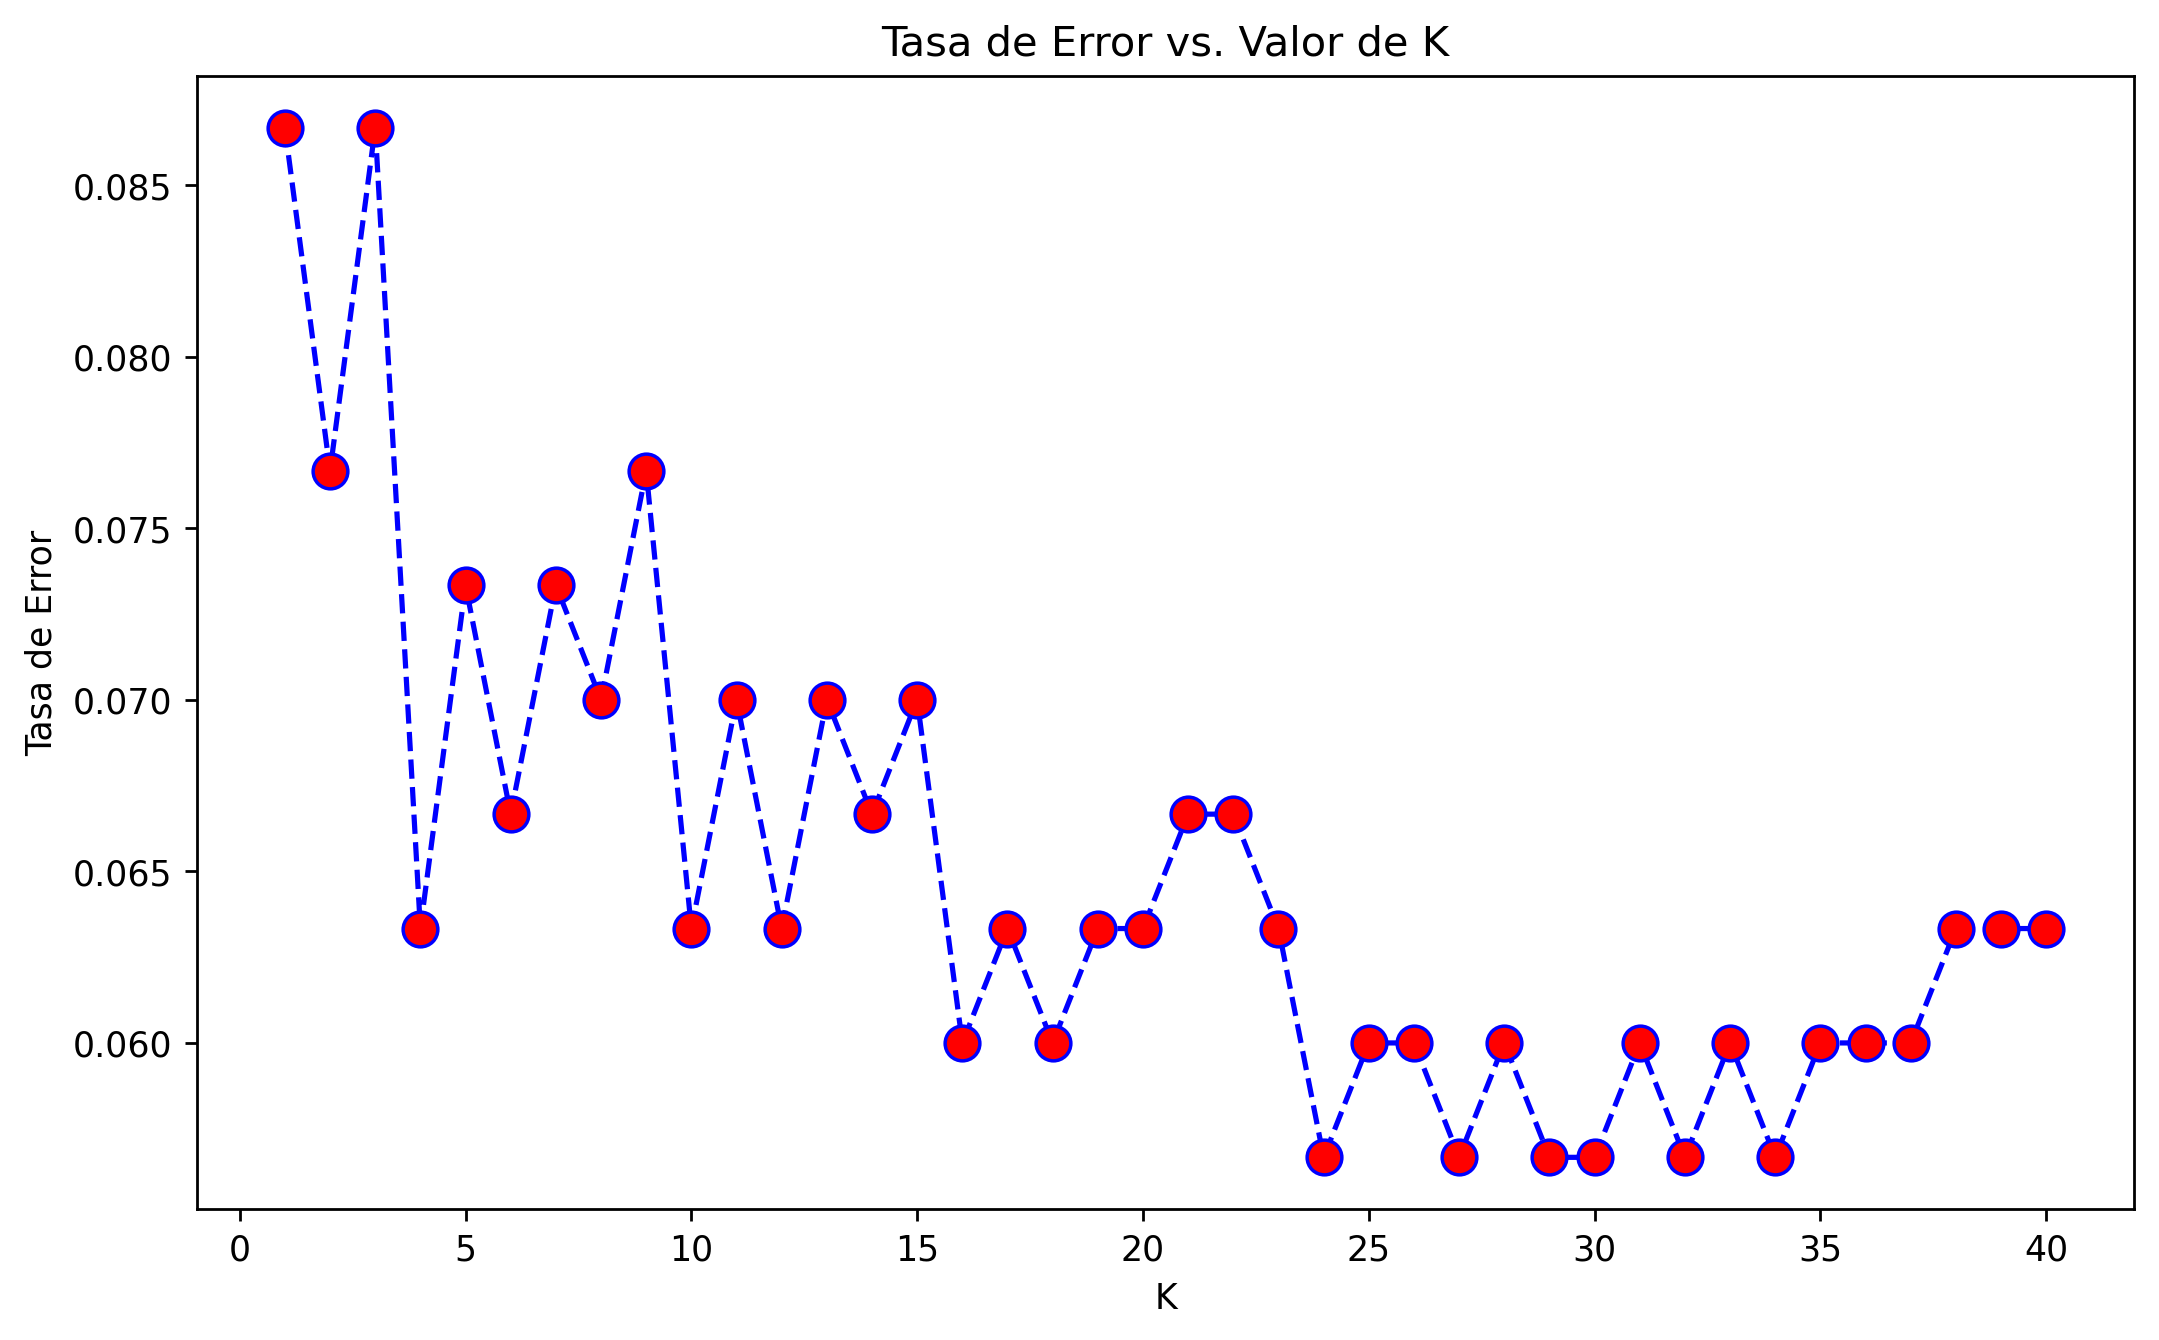

In [57]:
plt.figure(figsize=(10,6),dpi=250)
plt.plot(range(1,41),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

Aquí podemos ver que después de aplicar K> 23, la tasa de error tiende a rondar los 0.06-0.05. Reentrenemos el modelo con este dato y verifiquemos el informe de clasificación.

In [58]:
# PRIMERO UNA COMPARACIÓN RÁPIDA CON EL K=1 ORIGINAL
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=1


[[144  18]
 [  8 130]]


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       162
           1       0.88      0.94      0.91       138

    accuracy                           0.91       300
   macro avg       0.91      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300



In [59]:
# AHORA CON K=23
knn = KNeighborsClassifier(n_neighbors=24)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=24')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=24


[[149  13]
 [  4 134]]


              precision    recall  f1-score   support

           0       0.97      0.92      0.95       162
           1       0.91      0.97      0.94       138

    accuracy                           0.94       300
   macro avg       0.94      0.95      0.94       300
weighted avg       0.95      0.94      0.94       300



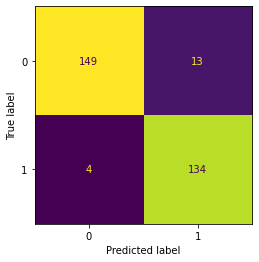

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,colorbar=False)

# CURVA DE ROC Y RECALL

In [65]:
from sklearn.metrics import plot_roc_curve

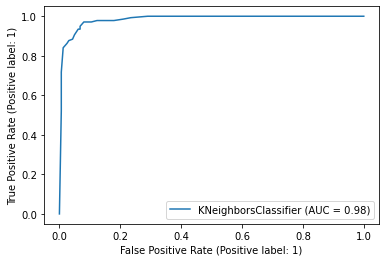

In [66]:
plot_roc_curve(knn,X_test,y_test)

In [67]:
from sklearn.metrics import plot_precision_recall_curve

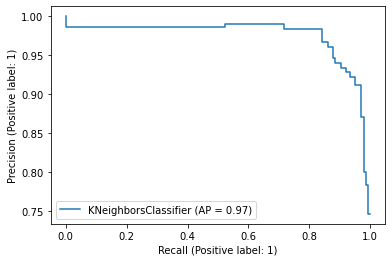

In [68]:
plot_precision_recall_curve(knn,X_test,y_test)

# Buen Trabajo!

¡Podemos mejorar más el rendimiento de nuestro modelo al encontrar un mejor valor de K!